# DELPHI simulations on FCChh

### 0.1) Import libraries

In [1]:
%pylab notebook

from __future__ import division
#from Impedance import *
#from DELPHI_testing import *
from DELPHI import *
from string import *
#from LHC_param import LHC_param
from BSH_coll import FCChh_param
#from SPS_param import SPS_param
import itertools
import os
from  scipy.constants import c as clight
import scipy.special
from scipy.misc import factorial
import collections

Populating the interactive namespace from numpy and matplotlib
('-f', '/afs/cern.ch/user/d/damorim/.local/share/jupyter/runtime/kernel-75095963-f20f-4850-bf17-12781f488faa.json')


## 1) FCChh scenario

In [3]:
# beam parameters
e,m0,c,E0=proton_param();


energy=3.3e12
V=12e6 #RF voltage

# energy=50e12
# V=16e6 #RF voltage

# scenario
#scenario='BS_only_3TeV_V1'
#scenario='BS_coll_3TeV_V1' 
#scenario='BS_collMoGr_3TeVV1'
#scenario='BS_collMoGr_interconnects_3TeVV6'


scenario='BS_coll_3TeVV1'
Nbscan=np.arange(0,10.2e11,0.2e11); #C coll case


#scenario='BS_collMoGr_3TeVV1' #
#Nbscan=np.arange(0,8.1e11,0.1e11); #MoGr coll case

#scenario='BS_only_3TeV_V1' #
#Nbscan=np.arange(0,15.2e11,2e10); #BS only

#scenario='BS_collMoGr_interconnects_3TeVV6' #
#Nbscan=np.arange(0,8.1e11,0.1e11); #MoGr coll case
#Nbscan=np.arange(0,10.2e11,0.2e11); #MoGr coll case



# scenraio directory
#root_result=ResultDir+'/'+scenario+'/'
#os.system("mkdir -p "+root_result);
   
# machine parameter    
machine_str,E,gamma,sigmaz,taub,R,Qx,Qxfrac,Qy,Qyfrac,Qs,eta,f0,omega0,omegas,dphase,Estr=FCChh_param(E=energy,V=V)
avbetax=R/Qx;avbetay=R/Qy; # average beta functions used

# longitudinal distribution
g,a,b=longdistribution_decomp(taub,typelong="Gaussian");

print "scenario: ",scenario

3TeV
scenario:  BS_coll_3TeVV1


In [4]:
print f0, Qx, Qy, taub, Qs

2942.0773811 120.31 120.32 1.06740514778e-09 0.00262256277315


In [5]:
0.267e-9*c

0.080044586286

## 2) Retrieve DELPHI's results


### 2.1) DELPHI parameters

### Plots

In [8]:
Qpscan=np.arange(-20,20.5,0.5)
#Nbscan=np.arange(0,15.2e11,2e10)
#Nbscan=np.arange(0,20.2e11,2e10)

In [13]:
M=1
dmax=0.0
plane='x'
imp_fact=1.0
Estr=float_to_str(energy/1e9)+'GeV';
iQp=np.where(Qpscan==0)[0]


DELPHI_results_dir='/afs/cern.ch/work/d/damorim/work/DELPHI_results/FCChh/'+scenario
os.system("mkdir -p "+DELPHI_results_dir)

0

In [14]:
'DELPHI_FCChh_'+scenario+'_d'+float_to_str(dmax)+'_Plot_TS_GR'

'DELPHI_FCChh_BS_coll_3TeVV1_d0_Plot_TS_GR'

In [15]:
(1/100)/(1/f0)

29.420773810961354

In [16]:
10/0.34

29.41176470588235

<IPython.core.display.Javascript object>


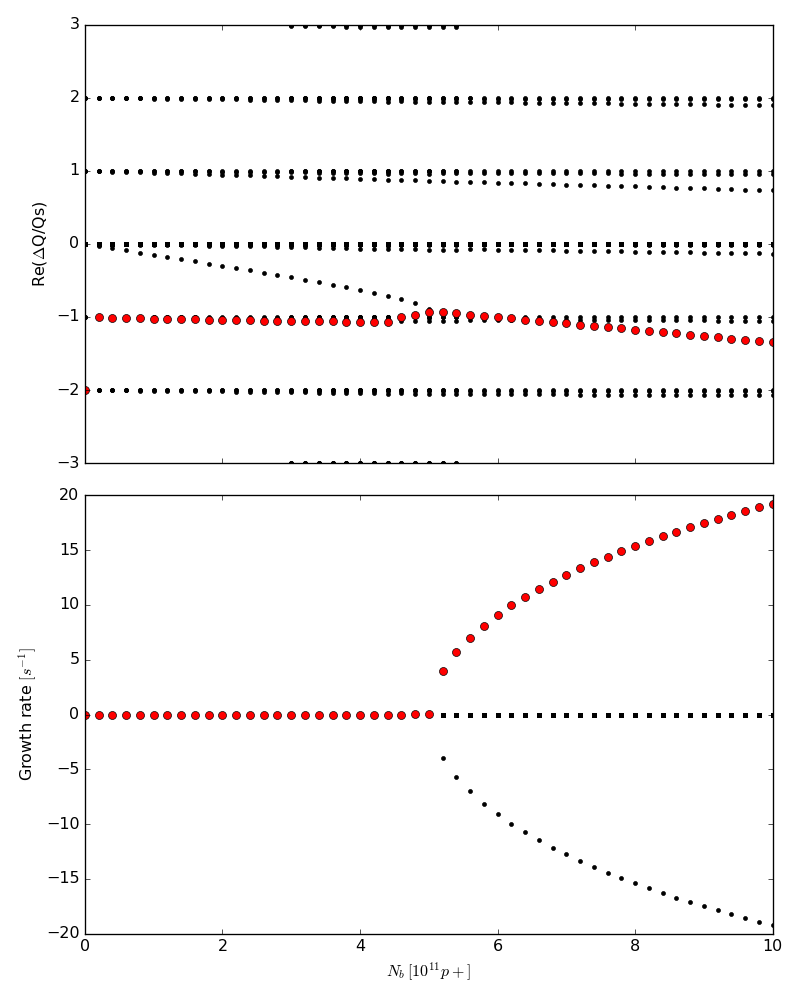

In [17]:
plt.close('all')

plt.figure(figsize=(800/96, 1000/96), dpi=96)



for Nb in Nbscan:
  
    basename = DELPHI_results_dir+'/ResultsFolder1/data_vs_Qp_all_FCChh_3300GeV'+scenario+'_1b'+'_d'+float_to_str(dmax)\
    +'_Nb'+('%.3g'%(Nb/1.e11)).replace('.','p')+'e11_1converged_x_'

    part='imag'
    fileoutdata_all=basename+part+'.dat';
    L=np.genfromtxt(fileoutdata_all, skip_header=1)
    Qp=L[iQp,0]
    Qim=-L[iQp,1:-1]

 
    ax1=plt.subplot(212)
    plt.plot(np.ones(len(Qim))*Nb/1.0e11,(Qim*omega0),'.k')
    plt.plot(Nb/1e11,Qim.max()*omega0,'or')
#     plt.ylim(-5, 5)
    plt.ylabel(r'Growth rate $[s^{-1}]$')
    plt.xlabel(r'$N_b\,[10^{11} p+]$')
   
    
    part='real'
    fileoutdata_all=basename+part+'.dat';
    L=np.genfromtxt(fileoutdata_all, skip_header=1)
    Qp=L[iQp,0]
    Qre=L[iQp,1:-1]
    Qre=(Qre)/Qs
    #Qre=(Qre)/1e-3

    ax2=plt.subplot(211,sharex=ax1)
    plt.plot(np.ones(len(Qre))*Nb/1e11,Qre,'.k')
    plt.plot(Nb/1e11,np.ravel(Qre)[Qim.argmax()],'or')
    #plt.ylim(-2, 2)
    plt.ylabel(r'Re($\Delta$Q/Qs)')
    plt.ylim(-3,3)
    plt.setp(ax2.get_xticklabels(), visible=False)
    

plt.tight_layout()
#plt.savefig('./Plots/DELPHI_FCChh_'+scenario+'_d'+float_to_str(dmax)+'_Plot_TS_GR_v3.pdf',format='pdf')

In [18]:
(3.3-2.5)/2.5

0.31999999999999995

In [19]:
(1.1-0.9)/0.9

0.2222222222222223

In [20]:
(1.06-0.9)/0.9

0.1777777777777778